<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

In [1]:
import pandas as pd
import numpy as np

# Feature Selection- Filter Methods
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from itertools import combinations

# For plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso   # To go to inital cells if approved

In [2]:
# Load the processed datasets (train, validation, test)
X_train = pd.read_parquet("./project_data/X_train_final.parquet", engine="pyarrow")
X_val   = pd.read_parquet("./project_data/X_val_final.parquet",   engine="pyarrow")
X_test  = pd.read_parquet("./project_data/X_test_final.parquet",  engine="pyarrow")

y_train = pd.read_parquet("./project_data/y_train.parquet", engine="pyarrow").squeeze("columns")
y_val   = pd.read_parquet("./project_data/y_val.parquet",   engine="pyarrow").squeeze("columns")


# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, X_test.shape)
print('\n',y_train.shape, y_val.shape)

(60765, 12) (15191, 12) (32567, 12)

 (60765,) (15191,)


In [3]:
X_train

,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,miles_per_year,Brand_freq_enc,transmission_freq_enc,fuelType_freq_enc,brand_model_freq_enc
0,0.689655,-0.426752,0.500,-0.685714,0.0,0.0,0.333333,-0.163392,1.322435,NaN,-1.0,-0.240664
1,-2.862069,0.461146,-0.750,-0.714286,0.0,0.0,0.000000,0.447533,1.322435,0.0,0.0,2.069617
2,0.000000,-0.426752,-0.625,0.228571,0.0,0.0,-0.666667,-0.858085,1.322435,0.0,0.0,1.161826
3,0.000000,-0.318471,-0.125,-0.571429,0.5,0.0,-0.666667,-1.043336,-0.238726,0.0,-1.0,-0.450899
4,0.000000,-0.070064,0.000,-0.400000,0.0,0.0,-0.666667,-0.874410,0.306933,-1.0,-1.0,1.474412
...,...,...,...,...,...,...,...,...,...,...,...,...
60760,0.172414,-1.439490,0.500,0.571429,-1.0,0.0,-0.666667,-1.124384,0.000000,-1.0,0.0,0.710927
60761,0.000000,-0.528662,-0.250,0.914286,1.0,0.0,0.666667,0.396222,1.322435,0.0,0.0,-0.397418
60762,-4.310345,0.757962,0.500,-0.942857,-0.5,0.0,0.333333,0.684643,0.000000,0.0,-1.0,0.710927
60763,-0.689655,0.299363,0.500,0.400000,0.5,0.0,0.666667,0.174769,1.322435,0.0,-1.0,0.066390


## <span style="color: #ffffff;">2.11 | Feature Selection</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

In this class, we will focus on a very important subset of pre-processing techniques, which is **Feature Selection**. When we have a dataset large numbers of features, it is very likely that some of them are **irrelevant**, **redundant** or **noisy**. These features can negatively impact the performance of our machine learning models:<br>
1. An additional feature is an additional dimension. This leads to a well-known problem called **curse of dimensionality**. As the number of dimensions increases, the volume of the space increases exponentially, making the available data sparse (essencially, we need more observations to fill the space) and, ultimately leading to overfitting.
2. Machine Learning Models are trained from the available data that is provided. In essence, given data, the algorithm will look (AND FIND) relationships between features and the target. If a feature is **irrelevant** or **noisy**, the models will learn from these features and find relationships that do not exist in the real world - often leading to overfitting.
3. Computationally speaking, redundant features provide no additional information, but they do increase the computational cost of training and using the model. Moreover, their presence makes a model more complex, harder to interpret, and worst case scenario, actually worse at generalizing.
</div>


### <span style="color: #ffffff;">2.11.1 |  Filter Methods</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.1 |  Filter Methods</b></span>
    </h1>
</div>


**Filter Methods** are techniques that rely on the **statistical properties** of the data rather than a specific machine learning model.  
They are **computationally efficient**, making them suitable for an **initial screening** of high-dimensional datasets.  
However, due to their simplicity, they are often considered **less effective** than *wrapper* or *embedded* methods, which depend on an underlying model.

In class, we explored **three main approaches**:

1. **Variance Threshold** – removes features with very low variance (constant or quasi-constant).  
2. **Correlation Indices** – identifies **redundant** features and, in some cases, measures the relationship with the target.  
3. **Statistical Hypothesis Testing** – evaluates statistically significant relationships between features and the target, helping to identify **relevant** variables.

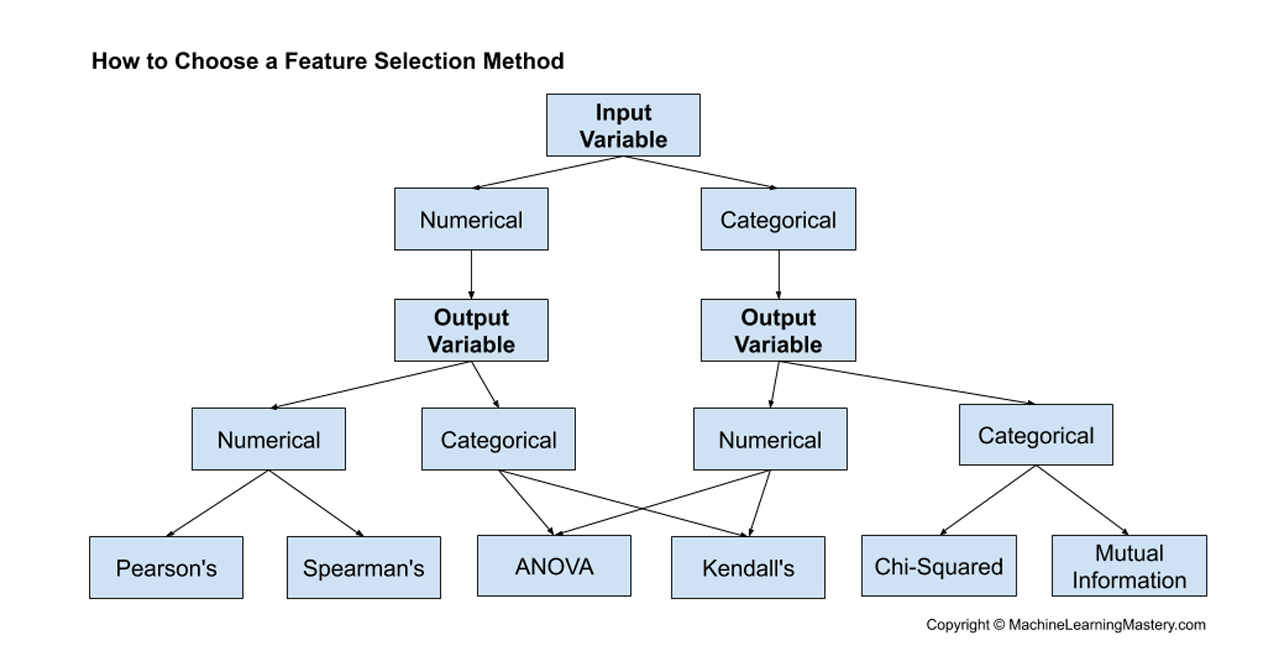

In [15]:
#### Low Variance ####
# Get rid of variables with variance close to zero (<= 0.01)
vart = VarianceThreshold(threshold=0.01)
#fit
X_train_sel = vart.fit(X_train)
# Get low variance columns and print them
low_variance = X_train.columns[vart.variances_ <= 0.01]

print("Features with variance closer to zero:")
for col in low_variance:
    print(f"{col}: {vart.variances_[X_train.columns.get_loc(col)]:.4f}")

Features with variance closer to zero:
hasDamage: 0.0000


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
DESDE MUITO CEDO SABÍAMOS QUE HASDAMAGE NÃO TINHA MUITA RELEVÂNCIA E QUANDO FIZEMOS INPUTATION SÓ TINHAMOS VALORES COM 0 ENTÃO FICOU TUDO A ZERO O QUE IMPLICA QUE ESTA VARIÁVEL É COMPLETAMENTE IRRELEVANTE PARA O NOSSO MODELO PELO QUE PODEMOS DESCARTÁ-LA

In [16]:
# Drop column 'hasDamage' from X_train, X_val, X_test
X_train = X_train.drop(columns=low_variance)
X_val = X_val.drop(columns=low_variance)
X_test = X_test.drop(columns=low_variance)

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
EXPLICAR A RAZÃO DE USAR SPEARMAN VS PEARSON E PARA QUE VARIÁVEIS <br>
</div>

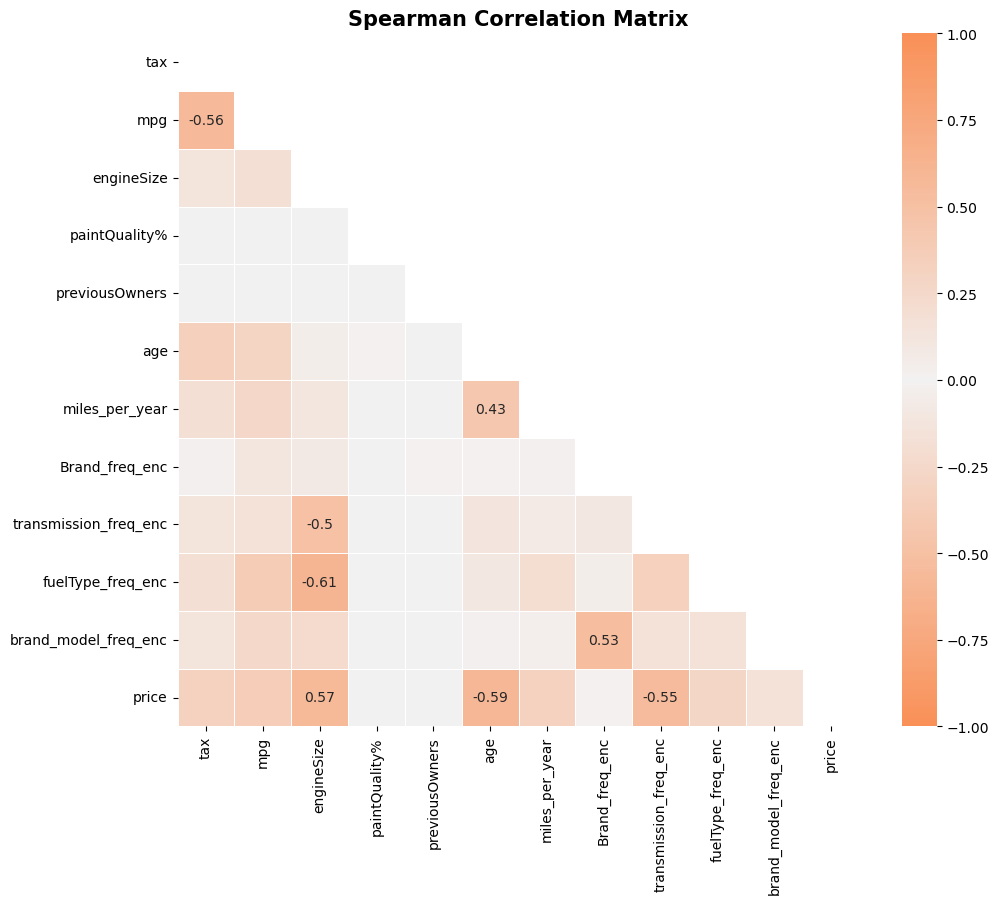

In [17]:
##### Spearman Correlation #### 
cor = pd.concat([X_train, y_train], axis=1).corr(method='spearman').round(2)                       

# Create a custom diverging colormap based on orange tones
cmap = sns.diverging_palette(h_neg=30, h_pos=30, s=90, l=70, n=256, center="light", as_cmap=True) 

# Create a Mask to hide the upper triangle (to avoid redundancy)
mask = np.zeros_like(cor, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Only show values where absolute correlation is >= 0.4
mask_annot = np.absolute(cor.values) >= 0.4
annot = np.where(mask_annot, cor.values, np.full(cor.shape, ""))


# Plotting
plt.figure(figsize=(11, 9))
sns.heatmap(
    data=cor,
    mask=mask,              # Hide the upper triangle
    cmap=cmap,              # Custom divergent color map
    annot=annot,            # Show annotations only if |value| >= 0.4
    fmt='s',                # Format annotations as strings
    vmin=-1, vmax=1, center=0, # Ensure the scale is from -1 to 1, centered at 0
    linewidths=0.5, 
)

plt.title('Spearman Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

In [18]:
cor_target = cor['price']
# Define a threshold for correlation with target variable to identify irrelevant variables
threshold = 0.2

# Identify features with low correlation to the target variable
low_corr_features = cor_target[abs(cor_target) < threshold].drop('price', errors='ignore') #drop 'price' because the correlation of target with itself is always 1

# Print the results
if not low_corr_features.empty:
    print(f"The variables with absolute Spearman correlation below {threshold}:")
    print(low_corr_features)
else:
    print(f"No variables found with absolute correlation below {threshold}.")

The variables with absolute Spearman correlation below 0.2:
paintQuality%           0.00
previousOwners         -0.00
Brand_freq_enc         -0.01
brand_model_freq_enc   -0.16
Name: price, dtype: float64


<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
SE POR ACASO PASSAREM PARA OHE TÊM DE ALTERAR AQUI UM POUCO OS TESTES E JÁ PODEM FAZER ESTE DE CHI-SQUARE 

In [19]:
def TestIndependence(X_1, X_2, vars):
    # Build contingency table
    dfObserved = pd.crosstab(X_1, X_2)
  
    # Chi-square test
    _, p, _, _ = stats.chi2_contingency(dfObserved.values)
    
    # Interpret result
    if p < 0.05:
        result = f"The variables '{vars}' are NOT independent (they are REDUNDANT)" # Reject H0 (H0: independent)
    else:
        result = f"The variables '{vars}' are INDEPENDENT (they are NOT redundant)" # Fail to reject H0

    print(result)

In [ ]:
#NAO HA binomiais
# apply the Chi-Square test to all pairs of binary variables
#bin_columns = X_train.columns
#for var1, var2 in combinations(bin_columns, 2):
#    TestIndependence(X_train[var1], X_train[var2], f"{var1} and {var2}")

### <span style="color: #ffffff;">2.11.2 |  Wrapper Methods</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.2 |  Wrapper Methods</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
ESTE CÓDIGO É COPIADO DAS AULAS E É OK PODEMOS USAR MAS MUDAR UMA COISA OU OUTRA FICAVA BEM

In [ ]:
#### RFE ####

#no of features
nof_list=np.arange(1,len(X_train.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
ESTE CÓDIGO ABAIXO É O RFE DO TOMÁS MAS NÃO PODE ASSUMIR QUAL O NR ÓTIMO DE FEATURE TEM QUE SER O ALGORITMO A DIZER

PODEMOS TER RFE COM OUTROS MODELOS TAMBÉM OU ALTERNATIVAS AO RFE QUE BASICAMENTE FAZEM A MESMA COISA MAS DE OUTRA FORMA

In [ ]:
# Create Linear Regression model 
model = LinearRegression()

# Perform RFE
# Select features 
rfe = RFE(estimator=model, n_features_to_select=len(X_train_enc.columns) // 2)

# Extract Price Colum
y_train_flat = y_train['price']  

# Fit RFE 
rfe.fit(X_train_enc, y_train_flat)

# Get the selected features
selected_features_rfe = [col for col, support in zip(X_train_enc.columns, rfe.support_) if support]

# Print the number and names of selected features
print(f"Number of Selected Features (RFE): {len(selected_features_rfe)} / {len(X_train_enc.columns)}")
print("Selected Features (RFE):", selected_features_rfe)

### <span style="color: #ffffff;">2.11.3 |  Embedded Methods</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.3 |  Embedded Methods</b></span>
    </h1>
</div>

In [ ]:
# Create Lasso Regression model
# alpha controls regularization strength
model = Lasso(alpha=0.1, random_state=42)

# Fit Lasso model
model.fit(X_train, y_train.ravel()) 

# Get selected features (those with non-zero coefficients)
selected_features_lasso = [col for col, coef in zip(X_train.columns, model.coef_) if abs(coef) > 0]

# Print the number and names of selected features
print(f"Number of Selected Features (Lasso): {len(selected_features_lasso)} / {len(X_train.columns)}")
print("Selected Features (Lasso):", selected_features_lasso)


In [ ]:
# Get absolute coefficients as feature importance for selected features
# Only include features with non-zero coefficients
feature_importance = np.abs(model.coef_)[model.coef_ != 0]

# Create a DataFrame to pair selected features with their importance values
importance_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add importance values as labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Label the axes and set the title
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance from Lasso Regression')

# Show the plot
plt.show()

| Predictor | Spearman | RFE LR| RFE SVM | Lasso | What to do?  | 
| --- | --- | --- | --- |--- |---|
| VAR1 | Keep | Keep | Keep |Keep | Keep |
| VAR2 | Keep | Keep | Keep |Keep| Discard |
| VAR3 | Keep?| Discard | Discard |Keep ?| Discard |
| VAR4 | Keep | Keep | Keep | Keep | Keep |
| VAR5 | Keep? | Discard | Keep | Keep | Keep |
# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
PASSOS A SEGUIR: <BR>
- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

O STOR DISSE QUE UM DOS PASSOS MAIS ESSENCIAIS É ESCOLHER BEM A **FITNESS F.**:    
O AI DEU-ME ISTO:

**Huber Loss** (A escolha padrão e mais recomendada):<BR>
Como funciona: É um híbrido. Para erros pequenos, comporta-se como o Erro Quadrático Médio (MSE), sendo eficiente. Para erros grandes (causados por outliers), comporta-se como o Erro Absoluto Médio (MAE), sendo robusto.
Como usar: Use modelos que a implementam diretamente, como HuberRegressor em scikit-learn.

**Erro Absoluto Médio** (MAE ou L1 Loss):<BR>
Como funciona: Penaliza o erro linearmente, não quadraticamente. Um outlier tem uma influência proporcional, não desproporcional.
Como usar: Use modelos como Lasso ou SGDRegressor(loss='epsilon_insensitive').

- TEMOS QUE USAR A MEDIDA QUE O PROF DIZ LÁ NO KAAGLE QUE NOS VAI AVALIAR MAS AS OUTRAS TEMOS DE TER UMA BOA JUSTIFICAÇÃO E NÃO USAR R^2 PORQUE É TIPO A PIOR MEDIDA!!!

In [ ]:
# Model definitions
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train) 
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
    
    # Print results
    print(f"{model_name} MAE: {mae:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} R²: {r2:.4f}")
    print("-" * 50)

# Print summary of all models
print("\nModel Evaluation Results Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

In [ ]:
#ESTES SÃO SÓ VALORES DE REFERÊNCIA DOS PRIMEIROS TESTES FEITOS, OS RESULTADOS AGORA DEVEM SER UM POUCO MELHORES QUE ESTES OU PELO MENOS IGUAIS

# Sem criar nem tirar variáveis (sem feature selection), usando OHE, sem tratar inconsistências, sem tratar outliers, sem fazer hyperparameter tuning
# tratando missing values com média, usando StandardScaler
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.7321, RMSE = 4177.1965, R² = 0.8204
# Ridge: MAE = 2553.7875, RMSE = 4175.5577, R² = 0.8206
# Lasso: MAE = 2551.7477, RMSE = 4173.1808, R² = 0.8208
# RandomForest: MAE = 1482.2024, RMSE = 2499.0898, R² = 0.9357
# GradientBoosting: MAE = 2321.1029, RMSE = 3500.0157, R² = 0.8739
# DecisionTree: MAE = 1941.1537, RMSE = 3275.1219, R² = 0.8896
# KNeighbors: MAE = 2384.9863, RMSE = 4107.6665, R² = 0.8264


#--------------------------------------------------
# + tirar hasDamage e ver inconsistências em year
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.5123, RMSE = 4174.7889, R² = 0.8206
# Ridge: MAE = 2553.6070, RMSE = 4173.2138, R² = 0.8208
# Lasso: MAE = 2551.6108, RMSE = 4170.9067, R² = 0.8210
# RandomForest: MAE = 1483.6105, RMSE = 2516.0255, R² = 0.9349
# GradientBoosting: MAE = 2321.9590, RMSE = 3489.0630, R² = 0.8747
# DecisionTree: MAE = 1952.7124, RMSE = 3365.4139, R² = 0.8834
# KNeighbors: MAE = 2384.8373, RMSE = 4107.8976, R² = 0.8263
#não houve grandes alterações, em alguns modelos melhorou, noutros piorou


# --------------------------------------------------
# tratando das inconsistências das minhas variáveis + ter hasdamage
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2549.0179, RMSE = 4170.6681, R² = 0.8210
# Ridge: MAE = 2548.0386, RMSE = 4169.0990, R² = 0.8211
# Lasso: MAE = 2546.5207, RMSE = 4167.1186, R² = 0.8213
# RandomForest: MAE = 1466.3328, RMSE = 2485.5036, R² = 0.9364
# GradientBoosting: MAE = 2307.7618, RMSE = 3451.5030, R² = 0.8774
# DecisionTree: MAE = 1942.4345, RMSE = 3364.6791, R² = 0.8835
# KNeighbors: MAE = 2106.1056, RMSE = 3683.4455, R² = 0.8604
# melhorou até bastante

